<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Movie-Recommendation---Mission-1" data-toc-modified-id="Movie-Recommendation---Mission-1-1">Movie Recommendation - Mission 1</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Movielense-Dataset-EDA" data-toc-modified-id="Movielense-Dataset-EDA-1.0.1">Movielense Dataset EDA</a></span></li></ul></li><li><span><a href="#대회-데이터셋-구성" data-toc-modified-id="대회-데이터셋-구성-1.1">대회 데이터셋 구성</a></span><ul class="toc-item"><li><span><a href="#data" data-toc-modified-id="data-1.1.1">data</a></span></li></ul></li><li><span><a href="#train/test-데이터셋-알아보기" data-toc-modified-id="train/test-데이터셋-알아보기-1.2">train/test 데이터셋 알아보기</a></span></li><li><span><a href="#데이터-다운로드" data-toc-modified-id="데이터-다운로드-1.3">데이터 다운로드</a></span></li><li><span><a href="#Side-Information(year,-writer,-title,-genre,-director)-알아보기" data-toc-modified-id="Side-Information(year,-writer,-title,-genre,-director)-알아보기-1.4">Side Information(year, writer, title, genre, director) 알아보기</a></span></li><li><span><a href="#데이터-시각화-해보기" data-toc-modified-id="데이터-시각화-해보기-1.5">데이터 시각화 해보기</a></span></li><li><span><a href="#마치며" data-toc-modified-id="마치며-1.6">마치며</a></span></li></ul></li></ul></div>

# Movie Recommendation - Mission 1

### Movielense Dataset EDA


EDA(Exploratory Data Analysis)는 데이터셋을 다양한 각도에서 관찰하고 인사이트를 얻을 수 있는 중요한 데이터 분석 과정입니다. 이를 잘 수행하여 데이터의 특징과 분포에 대해 깊은 이해도를 가진다면, 모델의 성능에도 큰 영향을 끼칠 수 있습니다.

본 미션에서는 Movie Recommendation 대회를 위해 제공되는 [movielens](https://grouplens.org/datasets/movielens/) 를 재구성한 대회 데이터셋에 대한 EDA를 진행하고, 학습 데이터에 더불어 영화의 side-information 데이터에 대해 이해하는 시간을 가져보겠습니다!

## 대회 데이터셋 구성
먼저 데이터셋의 구성을 살펴봅니다.

### data
    ├── directors.tsv
    ├── genres.tsv
    ├── titles.tsv
    ├── train_ratings.csv
    ├── writers.tsv
    └── years.tsv
    
1. *train_ratings.csv* : 전체 훈련 데이터.
2. *directors.tsv*, *genres.tsv*, *writers.tsv*, *years.tsv*, *titles.tsv* : 영화의 side-information 데이터.

## train/test 데이터셋 알아보기

Pandas를 이용하여 train 데이터를 로드하고 데이터 구성을 알아봅니다. 이어지는 코드를 실행하면 데이터셋의 간략한 정보와 샘플을 확인할 수 있습니다.

train 데이터셋은 *user, item, time* 세개의 column으로 구성된 반면, test 데이터셋은 *user* column과 비어있는 *item* column으로 구성되어 있음을 참고해 주세요. 대회 진행시, 각각의 사용자에게 10개의 영화를 추천하게 됩니다.

각 column은 다음을 나타냅니다.
- *user*: 사용자 id.
- *item*: 영화 id.
- *time*: 사용자가 해당 영화와 interact한 시간. (UNIX시간의 초 단위)

영화 id는 *directors.tsv, genres.tsv, writers.tsv, years.tsv, titles.tsv*에서도 일관적으로 사용됩니다. 즉, 동일한 영화 id는 side information 데이터셋에서 동일한 영화를 나타냅니다.

이어지는 cell들을 실행해서 직접 관찰해보세요!

## 데이터 다운로드
이곳에 대회 사이트(AI Stages)에 있는 data의 URL을 입력해주세요. 
- 데이터 URL은 변경될 수 있습니다.
- 예) `!wget https://aistages-prod-server-public.s3.amazonaws.com/app/Competitions/000176/data/data.tar.gz`

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
data_path = '../../data/train'
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv')) # 전체 학습 데이터

In [3]:
train_df.info()
train_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5154471 entries, 0 to 5154470
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   user    int64
 1   item    int64
 2   time    int64
dtypes: int64(3)
memory usage: 118.0 MB


,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563


In [4]:
num_train_users = train_df['user'].nunique()
num_train_items = train_df['item'].nunique()

print ("Number of unique train users: ", num_train_users)
print ("Number of unique train items: ", num_train_items)

Number of unique train users:  31360
Number of unique train items:  6807


In [5]:
print("Data sparsity ratio: ", 1 - len(train_df) / (num_train_users * num_train_items))

Data sparsity ratio:  0.9758536052697853


데이터의 sparsity ratio는 약 97.6%로 일반적인 추천 시스템 데이터셋에 비해 굉장히 dense한 (행렬 상 이력의 많은 부분이 채워져 있는) 데이터임을 알 수 있습니다.

## user와 item 탐구

### user

In [6]:
print("len(user) :", train_df['user'].nunique())
print("max(user) :", max(train_df['user']))

len(user) : 31360
max(user) : 138493


In [7]:
train_df['user'].value_counts()

8405      2912
54465     1980
24219     1842
32514     1830
91349     1795
          ... 
11211       32
128756      28
105578      22
68606       19
53188       16
Name: user, Length: 31360, dtype: int64

/tmp/ipykernel_10960/2010132485.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_df['user'].value_counts()[100:].hist(bins=100)


<AxesSubplot: >

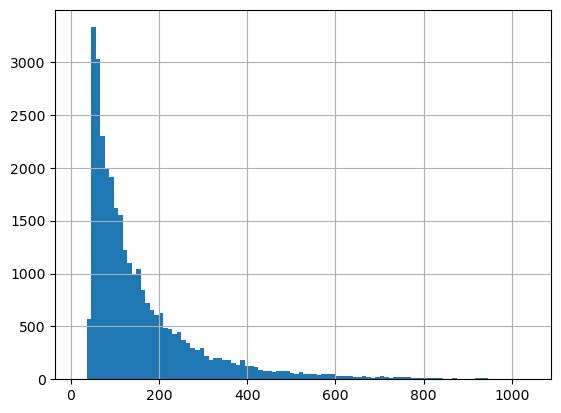

In [8]:
train_df['user'].value_counts()[100:].hist(bins=100)

### item

In [9]:
print("len(item) :", train_df['item'].nunique())
print("max(item) :", max(train_df['item']))

len(item) : 6807
max(item) : 119145


In [10]:
train_df['item'].value_counts()

2571     19699
2959     18437
296      18202
318      18168
356      17339
         ...  
7259        38
126         36
4241        34
2555        34
51372       27
Name: item, Length: 6807, dtype: int64

/tmp/ipykernel_10960/2195794959.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_df['item'].value_counts()[100:].hist(bins=100)


<AxesSubplot: >

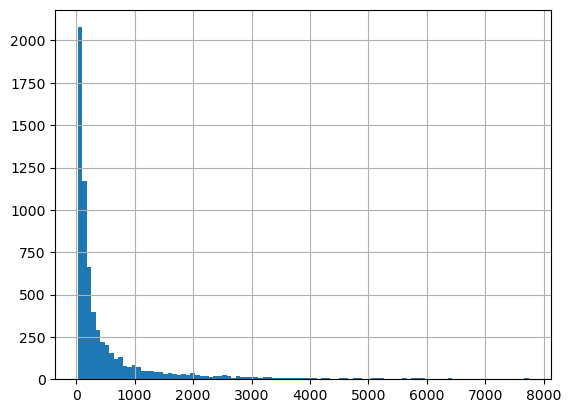

In [11]:
train_df['item'].value_counts()[100:].hist(bins=100)

## time 탐구

In [12]:
import time
from time import localtime

time_df = pd.DataFrame()
time_df['year'] = train_df['time'].apply(lambda x : localtime(x).tm_year)
time_df['year'].value_counts()

2008    679269
2006    647240
2007    589945
2005    572894
2009    517366
2010    510385
2011    427103
2012    421942
2013    338109
2014    308281
2015    141937
Name: year, dtype: int64

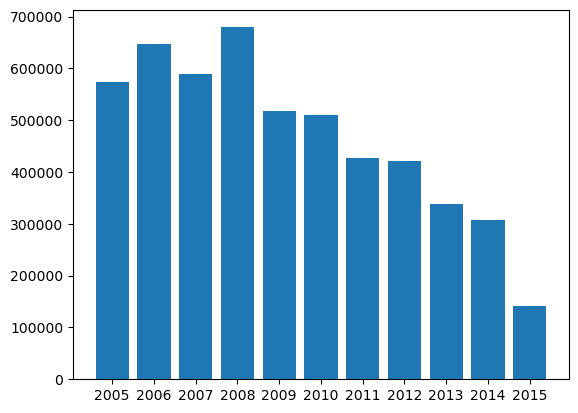

In [13]:
import matplotlib.pyplot as plt
plt.bar(time_df['year'].value_counts().index, time_df['year'].value_counts().values)
plt.xticks(time_df['year'].unique())
plt.show()

In [14]:
time_df['month'] = train_df['time'].apply(lambda x : localtime(x).tm_mon)
time_df['month'].value_counts()

1     508889
11    444009
10    442310
7     440935
5     439160
3     432249
12    431259
2     417357
6     414722
4     406257
9     390955
8     386369
Name: month, dtype: int64

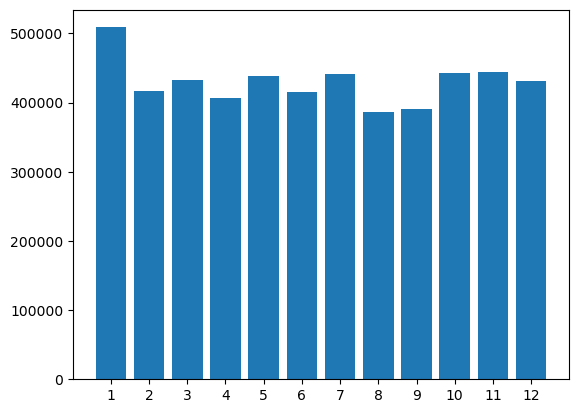

In [15]:
import matplotlib.pyplot as plt
plt.bar(time_df['month'].value_counts().index, time_df['month'].value_counts().values)
plt.xticks(time_df['month'].unique())
plt.show()

In [16]:
time_df['day'] = train_df['time'].apply(lambda x : localtime(x).tm_mday)
time_df['day'].value_counts()

29    190565
28    188988
7     176616
21    175851
20    175640
8     175150
4     174203
6     173887
17    172275
23    171040
18    168668
27    168330
3     168230
10    168135
26    167557
16    167322
11    166518
9     166393
15    166355
22    164570
24    164436
25    164273
5     164120
19    161716
13    161340
14    160471
2     160317
12    159489
30    158238
1     157269
31     96509
Name: day, dtype: int64

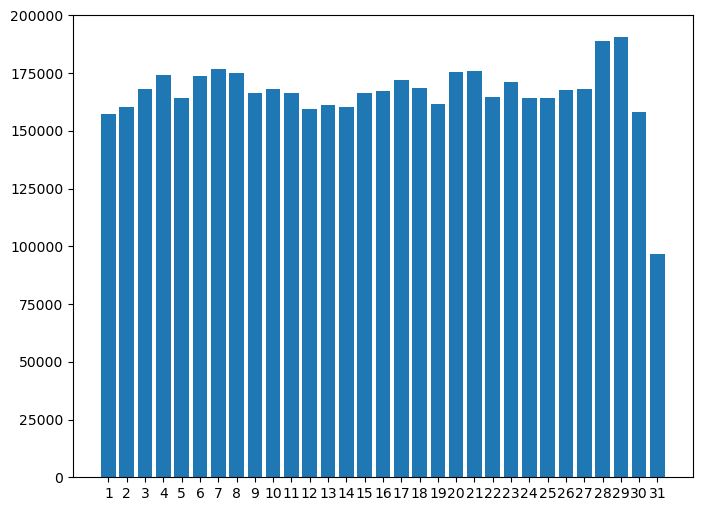

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(time_df['day'].value_counts().index, time_df['day'].value_counts().values)
plt.xticks(time_df['day'].unique())
plt.show()

In [18]:
time_df['hour'] = train_df['time'].apply(lambda x : localtime(x).tm_hour)
time_df['hour'].value_counts()

21    314571
20    311435
19    300987
22    292308
23    272292
18    272171
0     260333
2     248449
1     247278
17    247125
3     245660
16    225104
15    208895
4     194326
14    184949
5     181742
6     163859
13    163815
12    149108
7     142462
8     136983
11    132765
9     129500
10    128354
Name: hour, dtype: int64

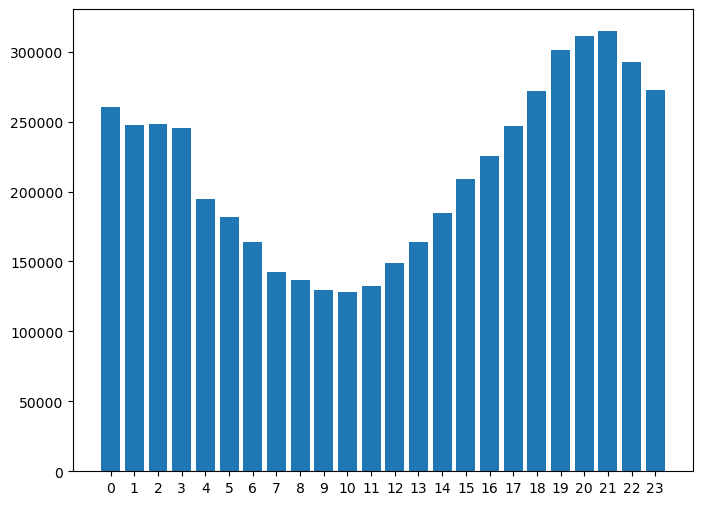

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(time_df['hour'].value_counts().index, time_df['hour'].value_counts().values)
plt.xticks(time_df['hour'].unique())
plt.show()

In [20]:
time_df['dayname'] = train_df['time'].apply(lambda x : localtime(x).tm_wday) # 요일(월요일~일요일, 0~6)
time_df['dayname'].value_counts()

6    827494
0    779835
1    760619
2    725169
5    708024
3    681803
4    671527
Name: dayname, dtype: int64

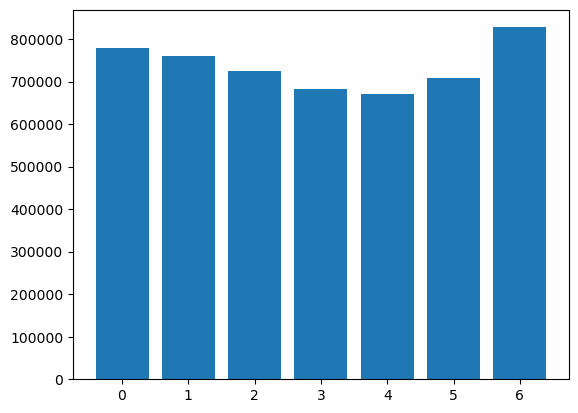

In [21]:
import matplotlib.pyplot as plt
plt.bar(time_df['dayname'].value_counts().index, time_df['dayname'].value_counts().values)
plt.xticks(time_df['dayname'].unique())
plt.show()

In [22]:
time_df['year_month'] = train_df['time'].apply(lambda x : time.strftime('%Y-%m', localtime(x)))

In [23]:
time_df['year_month'].value_counts()

2008-10    97398
2005-05    85051
2008-11    82306
2005-06    78259
2006-01    70201
           ...  
2014-08    21629
2014-06    21204
2014-04    20075
2013-10    19435
2014-09    17756
Name: year_month, Length: 120, dtype: int64

<AxesSubplot: >

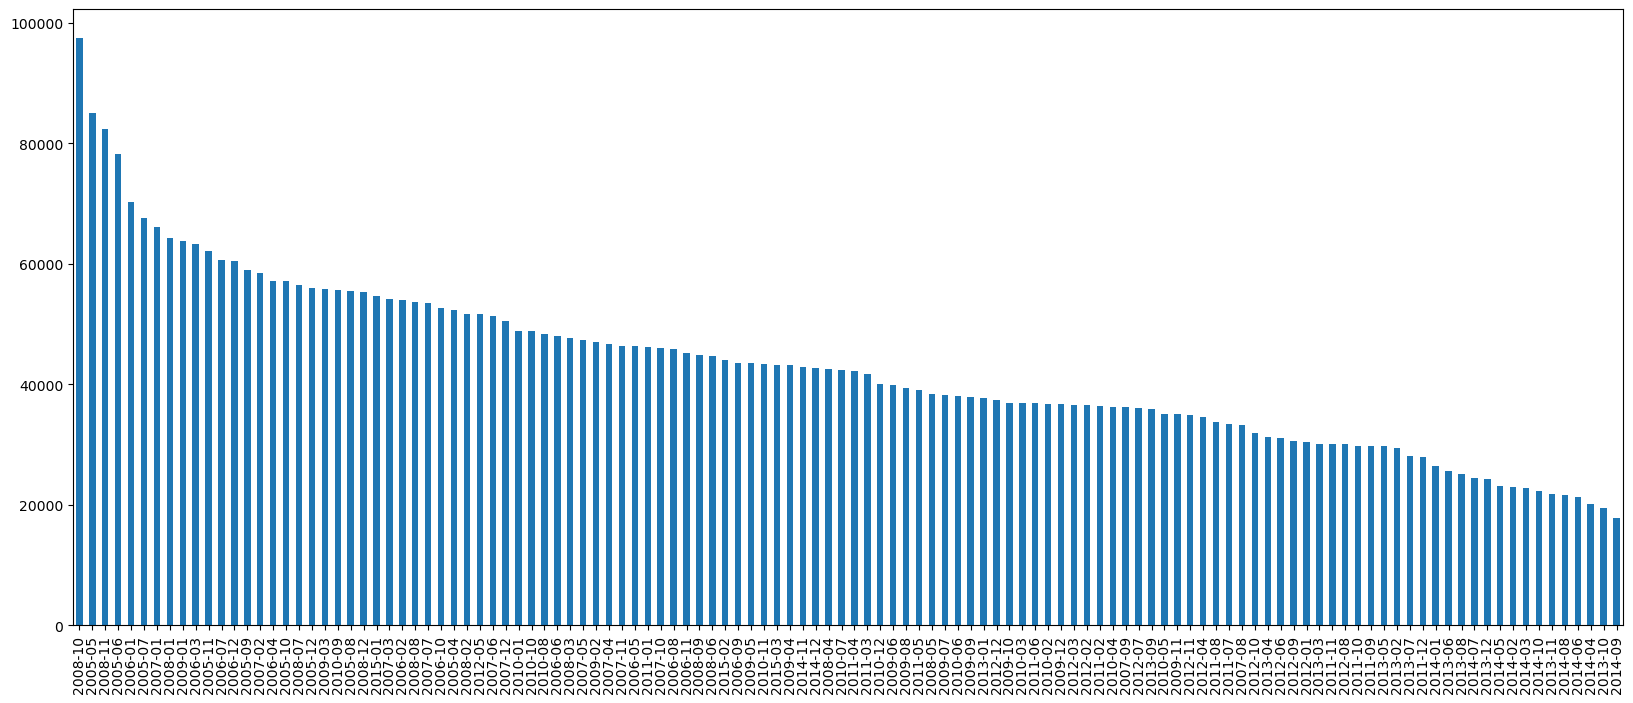

In [24]:
time_df['year_month'].value_counts().plot(kind = 'bar', figsize = (20,8))

In [25]:
time_df.sample(6)

,year,month,day,hour,dayname,year_month
3014332,2013,1,26,20,5,2013-01
3085725,2013,2,21,18,3,2013-02
3732449,2012,1,24,23,1,2012-01
885188,2006,1,17,19,1,2006-01
1972364,2014,11,20,16,3,2014-11
2657771,2012,1,11,5,2,2012-01


- user 11의 item 리뷰 time 분석

In [26]:
train_df[train_df['user'] == 11]

,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563
...,...,...,...
371,11,48738,1294796106
372,11,6291,1294796113
373,11,46578,1294796119
374,11,7153,1294796132


In [27]:
eleven_user_df = train_df[train_df['user'] == 11]
eleven_user_df['time2'] = eleven_user_df['time'].apply(lambda x : time.strftime('%Y-%m-%d %H:%M:%S', localtime(x)))
eleven_user_df

/tmp/ipykernel_10960/2221578818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eleven_user_df['time2'] = eleven_user_df['time'].apply(lambda x : time.strftime('%Y-%m-%d %H:%M:%S', localtime(x)))


,user,item,time,time2
0,11,4643,1230782529,2009-01-01 04:02:09
1,11,170,1230782534,2009-01-01 04:02:14
2,11,531,1230782539,2009-01-01 04:02:19
3,11,616,1230782542,2009-01-01 04:02:22
4,11,2140,1230782563,2009-01-01 04:02:43
...,...,...,...,...
371,11,48738,1294796106,2011-01-12 01:35:06
372,11,6291,1294796113,2011-01-12 01:35:13
373,11,46578,1294796119,2011-01-12 01:35:19
374,11,7153,1294796132,2011-01-12 01:35:32


-> 추가 idea

사용자가 활동한 연도까지의 영화 중 추천을 해보자.

결국 interaction history에서 비어있는 interaction을 알아맞추는 대회니까.

## Side Information(year, writer, title, genre, director) 알아보기

다음은 side information 데이터를 알아봅니다. 일반적으로 추천시스템에서는 side information을 더욱 잘 활용할수록 더 좋은 추천 결과를 얻을 수 있게 됩니다.

주어진 year, writer, title, genre, director 데이터를 불러옵니다. 마찬가지로 각 데이터의 간략한 정보를 확인하고 샘플을 미리 저장해보겠습니다. 샘플된 데이터는 뒤에서도 계속 사용할 예정인 점을 참고해주세요! 그럼 다음 코드를 실행해보겠습니다.

In [28]:
year_data = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')
writer_data = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep='\t')
title_data = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep='\t')
genre_data = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')
director_data = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep='\t')

### year

그러면 먼저 *years.tsv* 데이터를 알아보겠습니다. 
각 column은 다음과 같은 정보를 담고 있습니다:
- *item* : 영화 id.
- *year* : 해당 영화가 개봉한 연도.

다음 코드를 실행하여 각 column의 data type과 같은 정보를 파악하고, 샘플 데이터를 출력해봅니다.

그리고 바로 이어지는 cell을 실행하여 추가적인 통계도 확인합니다. 데이터셋에 한 번 이상 출현하는 영화 작품은 총 6799편이며 평균 개봉 연도는 1992년인 등의 정보를 파악할 수 있습니다.

In [29]:
year_data.info()
year_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   item    6799 non-null   int64
 1   year    6799 non-null   int64
dtypes: int64(2)
memory usage: 106.4 KB


,item,year
0,1348,1922
1,44587,1922
2,4768,1922
3,8235,1923
4,8609,1923


In [30]:
print ("Year data shape: ", year_data.shape)
print("Number of unique items in year_df: ", year_data['item'].nunique())
print("Number of unique years: ", year_data['year'].nunique())
print ("\nStatistics of year data: ")
year_data['year'].describe()

Year data shape:  (6799, 2)
Number of unique items in year_df:  6799
Number of unique years:  93

Statistics of year data: 


count    6799.000000
mean     1992.174732
std        19.052568
min      1922.000000
25%      1985.000000
50%      1999.000000
75%      2006.000000
max      2014.000000
Name: year, dtype: float64

In [31]:
# train_df에서의 year data 결측치 확인
pd.merge(train_df, year_data, on='item', how='left').isnull().sum()

user       0
item       0
time       0
year    1832
dtype: int64

In [32]:
year_df = pd.merge(train_df, year_data, on='item', how='left')
year_df[year_df['year'].isnull()]

,user,item,time,year
3486,132,6987,1114010962,NaN
13645,413,6987,1128709337,NaN
14766,425,3310,1418071653,NaN
15678,448,6987,1128537722,NaN
19598,563,6987,1171575158,NaN
...,...,...,...,...
5147569,138325,8511,1268938902,NaN
5147629,138325,7065,1279124995,NaN
5150507,138406,3310,1139933369,NaN
5150755,138406,32898,1372717892,NaN


In [33]:
year_df[year_df['year'].isnull()]['item'].nunique()

8

8개의 item의 year(개봉 연도) data가 누락되어있고, 해당 아이템을 전체 train_df로 보면 총 1832개의 결측치가 있는 셈이다.

혹시 item이 똑같은 영화라도 다른 연도에 개봉한 영화가 있나? 

-> 없다!

In [34]:
null_year_list = year_df[year_df['year'].isnull()]['item'].unique()
for year in null_year_list:
    print(year_df[year_df['item'] == year]['year'].unique())

[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]


### writer

다음은 *writers.tsv* 데이터입니다. 
각 column은 다음과 같은 정보를 담고 있습니다:
- *item* : 영화 id.
- *writer* : 영화의 각본가. (익명화)

다음 코드를 실행하여 각 column의 data type과 같은 정보를 파악하고, 샘플 데이터를 출력해봅니다.

In [35]:
writer_data.info()
writer_data.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11306 entries, 0 to 11305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    11306 non-null  int64 
 1   writer  11306 non-null  object
dtypes: int64(1), object(1)
memory usage: 176.8+ KB


,item,writer
0,1237,nm0000005
1,5147,nm0000005


In [36]:
print ("writer data shape: ", writer_data.shape)
print("Number of unique items in writer_df: ", writer_data['item'].nunique())
print("Number of unique writers: ", writer_data['writer'].nunique())

writer data shape:  (11306, 2)
Number of unique items in writer_df:  5648
Number of unique writers:  2989


In [37]:
# train_df에서의 writer data 결측치 확인
pd.merge(train_df, writer_data, on='item', how='left').isnull().sum()

user           0
item           0
time           0
writer    312692
dtype: int64

In [38]:
writer_df = pd.merge(train_df, writer_data, on='item', how='left')
writer_df[writer_df['writer'].isnull()]

,user,item,time,writer
4,11,170,1230782534,NaN
58,11,5151,1230783478,NaN
61,11,33585,1230783564,NaN
120,11,1225,1230784460,NaN
122,11,59418,1230784666,NaN
...,...,...,...,...
11591191,138493,8905,1255856919,NaN
11591192,138493,52579,1255856957,NaN
11591475,138493,1429,1256854805,NaN
11591494,138493,1298,1258134713,NaN


In [39]:
writer_df[writer_df['writer'].isnull()]['item'].nunique()

1159

1159개의 item에 대해 writer(각본가)가 누락되었으며, 전체 train_df에 대해 결측치가 총 312692개 있다. (약 6%)

In [40]:
writer_id = writer_df.value_counts('writer').index[:10]


side_df = []
for writer in writer_id:
    side_df.append(writer_df.loc[writer_df['writer'] == writer])

writer_top = pd.concat(side_df) 

print ("Number of all unique movie writers: ", writer_df['writer'].nunique())
print ("\ntop 10 movie writers: \n", writer_id)
print ("\nsample of top 10 user-writer data: \n", writer_top.sample(5))
print ("\nshape of the data: ", writer_top.shape)

Number of all unique movie writers:  2989

top 10 movie writers: 
 Index(['nm0000184', 'nm0000233', 'nm0634240', 'nm0001392', 'nm0909638',
       'nm0004056', 'nm0744429', 'nm0101991', 'nm0254645', 'nm0000175'],
      dtype='object', name='writer')

sample of top 10 user-writer data: 
           user  item        time     writer
656670    7724  1089  1211575256  nm0000233
5317283  62862  4993  1298764325  nm0101991
4730613  55798  4993  1135768058  nm0001392
6031546  71671  2193  1181495368  nm0000184
2287398  26835  4993  1156952378  nm0909638

shape of the data:  (651286, 4)


In [41]:
writer_data['writer'].value_counts()

nm0000095    47
nm0000636    35
nm0000175    32
nm0372942    30
nm0000108    29
             ..
nm0414893     2
nm0414448     2
nm0414117     2
nm0414047     2
nm5927608     2
Name: writer, Length: 2989, dtype: int64

In [42]:
writer_data['writer'].value_counts().describe()

count    2989.000000
mean        3.782536
std         2.993783
min         2.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        47.000000
Name: writer, dtype: float64

<AxesSubplot: >

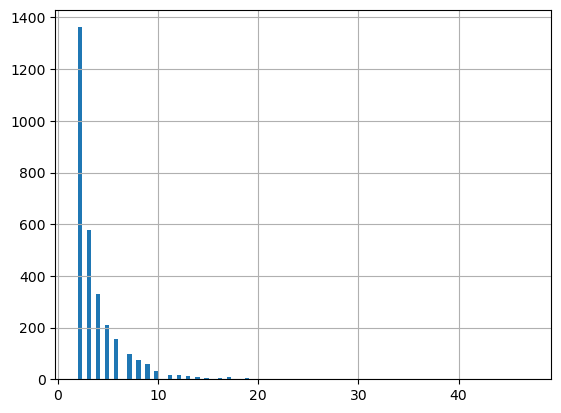

In [43]:
writer_data['writer'].value_counts().hist(bins=100)

### title

다음은 *titles.tsv* 데이터입니다. 
각 column은 다음과 같은 정보를 담고 있습니다:
- *item* : 영화 id.
- *titles* : 영화 제목.

다음 코드를 실행하여 각 column의 data type과 같은 정보를 파악하고, 샘플 데이터를 출력해봅니다.

In [44]:
title_data.info()
title_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    6807 non-null   int64 
 1   title   6807 non-null   object
dtypes: int64(1), object(1)
memory usage: 106.5+ KB


,item,title
0,318,"Shawshank Redemption, The (1994)"
1,2571,"Matrix, The (1999)"
2,2959,Fight Club (1999)
3,296,Pulp Fiction (1994)
4,356,Forrest Gump (1994)


In [45]:
print ("title data shape: ", title_data.shape)
print("Number of unique items in title_df: ", title_data['item'].nunique())
print("Number of unique titles: ", title_data['title'].nunique())

title data shape:  (6807, 2)
Number of unique items in title_df:  6807
Number of unique titles:  6806


In [46]:
title_df = pd.merge(train_df, title_data, on='item', how='left')
title_df.isnull().sum() # title은 결측치 데이터가 없다.

user     0
item     0
time     0
title    0
dtype: int64

In [47]:
title_df['title'].value_counts()

Matrix, The (1999)                   19699
Fight Club (1999)                    18437
Pulp Fiction (1994)                  18202
Shawshank Redemption, The (1994)     18168
Forrest Gump (1994)                  17339
                                     ...  
You Got Served (2004)                   38
NeverEnding Story III, The (1994)       36
Baby Geniuses (1999)                    34
Pokémon 3: The Movie (2001)             34
"Great Performances" Cats (1998)        27
Name: title, Length: 6806, dtype: int64

In [48]:
title_df.shape

(5154471, 4)

혹시 title이 같은데 item이 다른 영화가 있나?

In [49]:
title_data[title_data.duplicated(['title'])]

,item,title
1926,64997,War of the Worlds (2005)


In [50]:
title_data[title_data['title'] == 'War of the Worlds (2005)']

,item,title
349,34048,War of the Worlds (2005)
1926,64997,War of the Worlds (2005)


In [51]:
title_df[title_df['title'] == 'War of the Worlds (2005)'][['item', 'title']].value_counts()

item   title                   
34048  War of the Worlds (2005)    3022
64997  War of the Worlds (2005)     178
dtype: int64

### genre

다음은 *genres.tsv* 데이터입니다. 
각 column은 다음과 같은 정보를 담고 있습니다:
- *item* : 영화 id.
- *genre* : 영화의 장르.

하나의 영화는 여러 개의 장르를 가질 수 있습니다.
다음 코드를 실행하여 각 column의 data type과 같은 정보를 파악하고, 샘플 데이터를 출력해봅니다.

In [52]:
genre_data.info()
genre_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15933 entries, 0 to 15932
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    15933 non-null  int64 
 1   genre   15933 non-null  object
dtypes: int64(1), object(1)
memory usage: 249.1+ KB


,item,genre
0,318,Crime
1,318,Drama
2,2571,Action
3,2571,Sci-Fi
4,2571,Thriller


In [53]:
print ("genre data shape: ", genre_data.shape)
print("Number of unique items in genre_df: ", genre_data['item'].nunique())
print("Number of unique genres: ", genre_data['genre'].nunique())

genre data shape:  (15933, 2)
Number of unique items in genre_df:  6807
Number of unique genres:  18


In [54]:
pd.merge(train_df, genre_data, on='item', how='left').isnull().sum() # genre는 결측치 데이터가 없다.

user     0
item     0
time     0
genre    0
dtype: int64

In [55]:
genre_data.head() # 결측치는 없는데, item이 같아도 genre가 다를 수 있음.

,item,genre
0,318,Crime
1,318,Drama
2,2571,Action
3,2571,Sci-Fi
4,2571,Thriller


In [56]:
genre_data.groupby('item')['genre'].count()

item
1         5
2         3
3         2
4         3
5         1
         ..
118700    1
118900    1
118997    4
119141    2
119145    4
Name: genre, Length: 6807, dtype: int64

In [57]:
genre_data.groupby('item')['genre'].count().value_counts()

2     2280
3     1786
1     1756
4      726
5      212
6       38
7        7
8        1
10       1
Name: genre, dtype: int64

<AxesSubplot: >

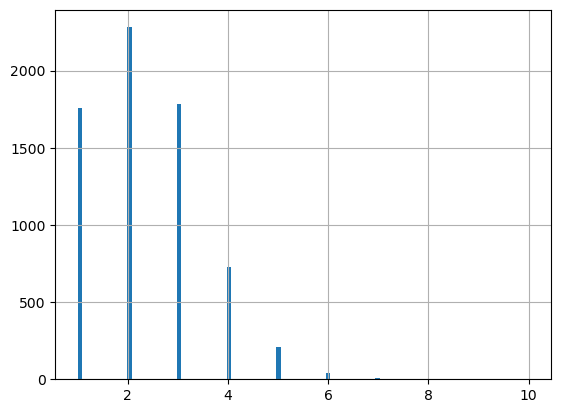

In [58]:
genre_data.groupby('item')['genre'].count().hist(bins=100)

### director

마지막으로 *directors.tsv* 데이터입니다. 
각 column은 다음과 같은 정보를 담고 있습니다:
- *item* : 영화 id.
- *director* : 영화 감독. (익명화)

하나의 영화는 여러 명의 감독을 가질 수 있습니다. 다음 코드를 실행하여 각 column의 data type과 같은 정보를 파악하고, 샘플 데이터를 출력해봅니다.

In [59]:
director_data.info()
director_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5905 entries, 0 to 5904
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item      5905 non-null   int64 
 1   director  5905 non-null   object
dtypes: int64(1), object(1)
memory usage: 92.4+ KB


,item,director
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005


In [60]:
print ("director data shape: ", director_data.shape)
print("Number of unique items in director_df: ", director_data['item'].nunique())
print("Number of unique directors: ", director_data['director'].nunique())

director data shape:  (5905, 2)
Number of unique items in director_df:  5503
Number of unique directors:  1340


In [61]:
# train_df에서의 director data 결측치 확인
pd.merge(train_df, director_data, on='item', how='left').isnull().sum()

user             0
item             0
time             0
director    301445
dtype: int64

In [62]:
director_data[director_data.duplicated(['item'])].value_counts('item')

item
50912     13
1282       9
27002      7
71823      6
596        6
          ..
5377       1
5444       1
5574       1
5636       1
119141     1
Length: 283, dtype: int64

## 5개의 추가 정보를 다 merge 해줬을 때

먼저 5개의 추가 정보들의 고유값 개수를 다시 한눈에 비교해보자

In [63]:
print("year :", year_data['year'].nunique())
print("writer :", writer_data['writer'].nunique())
print("title :", title_data['title'].nunique())
print("genre :", genre_data['genre'].nunique())
print("director :", director_data['director'].nunique())

year : 93
writer : 2989
title : 6806
genre : 18
director : 1340


중복 데이터는 첫번째 데이터만 남기고 나머지는 제거 후, left로 merge 해보자.

In [64]:
df_merge = pd.merge(train_df, year_data.drop_duplicates(subset=['item']), on='item', how='left')
df_merge = pd.merge(df_merge, writer_data.drop_duplicates(subset=['item']), on='item', how='left')
df_merge = pd.merge(df_merge, title_data.drop_duplicates(subset=['item']), on='item', how='left')
df_merge = pd.merge(df_merge, genre_data.drop_duplicates(subset=['item']), on='item', how='left')
df_merge = pd.merge(df_merge, director_data.drop_duplicates(subset=['item']), on='item', how='left')

df_merge.head()

,user,item,time,year,writer,title,genre,director
0,11,4643,1230782529,2001.0,nm0099541,Planet of the Apes (2001),Action,nm0000318
1,11,170,1230782534,1995.0,NaN,Hackers (1995),Action,nm0812200
2,11,531,1230782539,1993.0,nm0003031,"Secret Garden, The (1993)",Children,nm0002140
3,11,616,1230782542,1970.0,nm0027011,"Aristocats, The (1970)",Animation,nm0718627
4,11,2140,1230782563,1982.0,nm0001345,"Dark Crystal, The (1982)",Adventure,nm0000568


In [65]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5154471 entries, 0 to 5154470
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user      int64  
 1   item      int64  
 2   time      int64  
 3   year      float64
 4   writer    object 
 5   title     object 
 6   genre     object 
 7   director  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 353.9+ MB


In [66]:
# 전체 train_df에서 year 정보가 NaN 값인 행 확인
df_merge[df_merge['year'].isnull()]

,user,item,time,year,writer,title,genre,director
3486,132,6987,1114010962,NaN,nm0562346,"Cabinet of Dr. Caligari, The (Cabinet des Dr. ...",Crime,NaN
13645,413,6987,1128709337,NaN,nm0562346,"Cabinet of Dr. Caligari, The (Cabinet des Dr. ...",Crime,NaN
14766,425,3310,1418071653,NaN,nm0000122,"Kid, The (1921)",Comedy,nm0000122
15678,448,6987,1128537722,NaN,nm0562346,"Cabinet of Dr. Caligari, The (Cabinet des Dr. ...",Crime,NaN
19598,563,6987,1171575158,NaN,nm0562346,"Cabinet of Dr. Caligari, The (Cabinet des Dr. ...",Crime,NaN
...,...,...,...,...,...,...,...,...
5147569,138325,8511,1268938902,NaN,nm0000122,"Immigrant, The (1917)",Comedy,nm0000122
5147629,138325,7065,1279124995,NaN,nm0000428,"Birth of a Nation, The (1915)",Drama,nm0000428
5150507,138406,3310,1139933369,NaN,nm0000122,"Kid, The (1921)",Comedy,nm0000122
5150755,138406,32898,1372717892,NaN,nm0894523,"Trip to the Moon, A (Voyage dans la lune, Le) ...",Action,NaN


<AxesSubplot: >

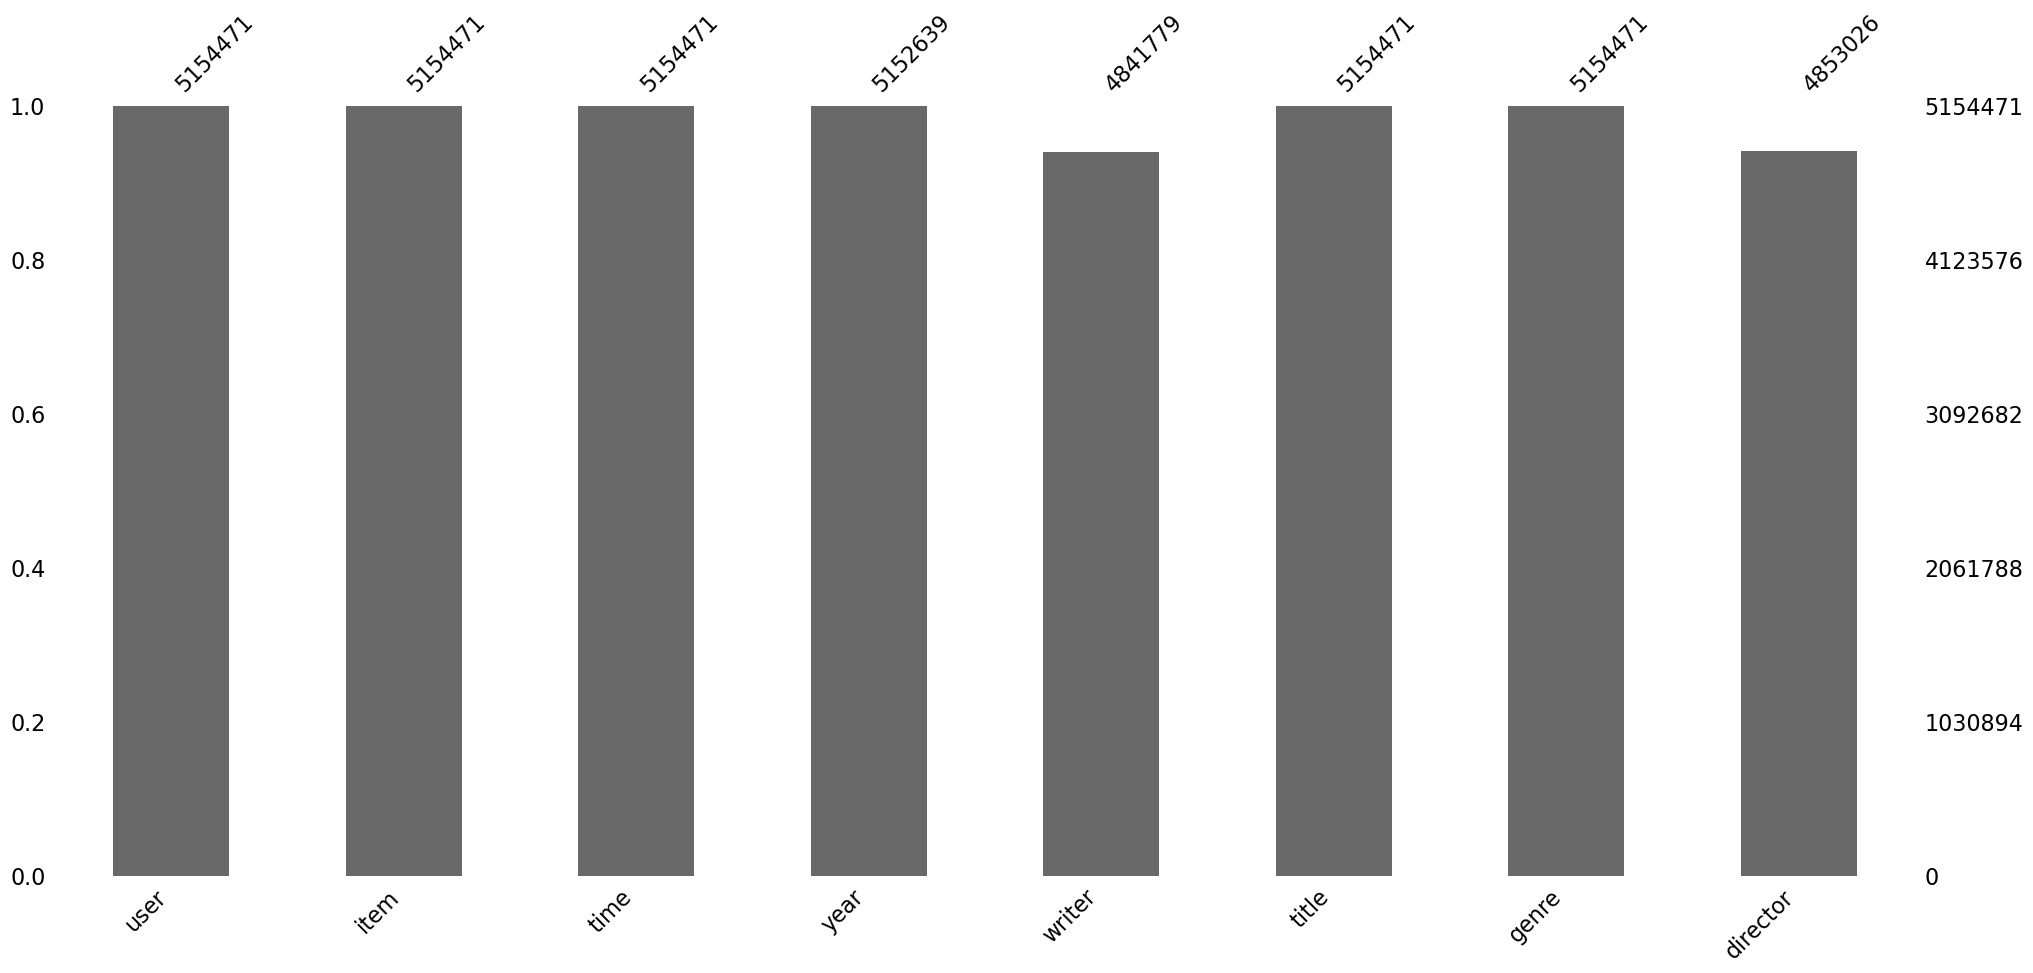

In [71]:
import missingno
missingno.bar(df_merge)

위의 missingno 결측치 시각화 그래프를 보아,

year, writer, director 컬럼에 결측치가 있음을 확인할 수 있다.

### 위 조건에서 결측치는 제외하고 inner merge 해줬을 때

In [67]:
df_merge2 = pd.merge(train_df, year_data.drop_duplicates(subset=['item']), on='item', how='inner')
df_merge2 = pd.merge(df_merge2, writer_data.drop_duplicates(subset=['item']), on='item', how='inner')
df_merge2 = pd.merge(df_merge2, title_data.drop_duplicates(subset=['item']), on='item', how='inner')
df_merge2 = pd.merge(df_merge2, genre_data.drop_duplicates(subset=['item']), on='item', how='inner')
df_merge2 = pd.merge(df_merge2, director_data.drop_duplicates(subset=['item']), on='item', how='inner')

df_merge2.head()

,user,item,time,year,writer,title,genre,director
0,11,4643,1230782529,2001,nm0099541,Planet of the Apes (2001),Action,nm0000318
1,189,4643,1302945016,2001,nm0099541,Planet of the Apes (2001),Action,nm0000318
2,294,4643,1288437662,2001,nm0099541,Planet of the Apes (2001),Action,nm0000318
3,383,4643,1261996844,2001,nm0099541,Planet of the Apes (2001),Action,nm0000318
4,421,4643,1190624541,2001,nm0099541,Planet of the Apes (2001),Action,nm0000318


inner join 시, left join보다 merge한 전체 데이터 개수가 적어지는 것을 확인할 수 있다.

5154471  ->  4658299

In [68]:
df_merge2.info() #  5154471  ->  4658299

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4658299 entries, 0 to 4658298
Data columns (total 8 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user      int64 
 1   item      int64 
 2   time      int64 
 3   year      int64 
 4   writer    object
 5   title     object
 6   genre     object
 7   director  object
dtypes: int64(4), object(4)
memory usage: 319.9+ MB


In [73]:
# 유저 수 변화 확인
print("df_merge :", df_merge['user'].nunique())
print("df_merge2 :", df_merge2['user'].nunique())

df_merge : 31360
df_merge2 : 31360


<AxesSubplot: >

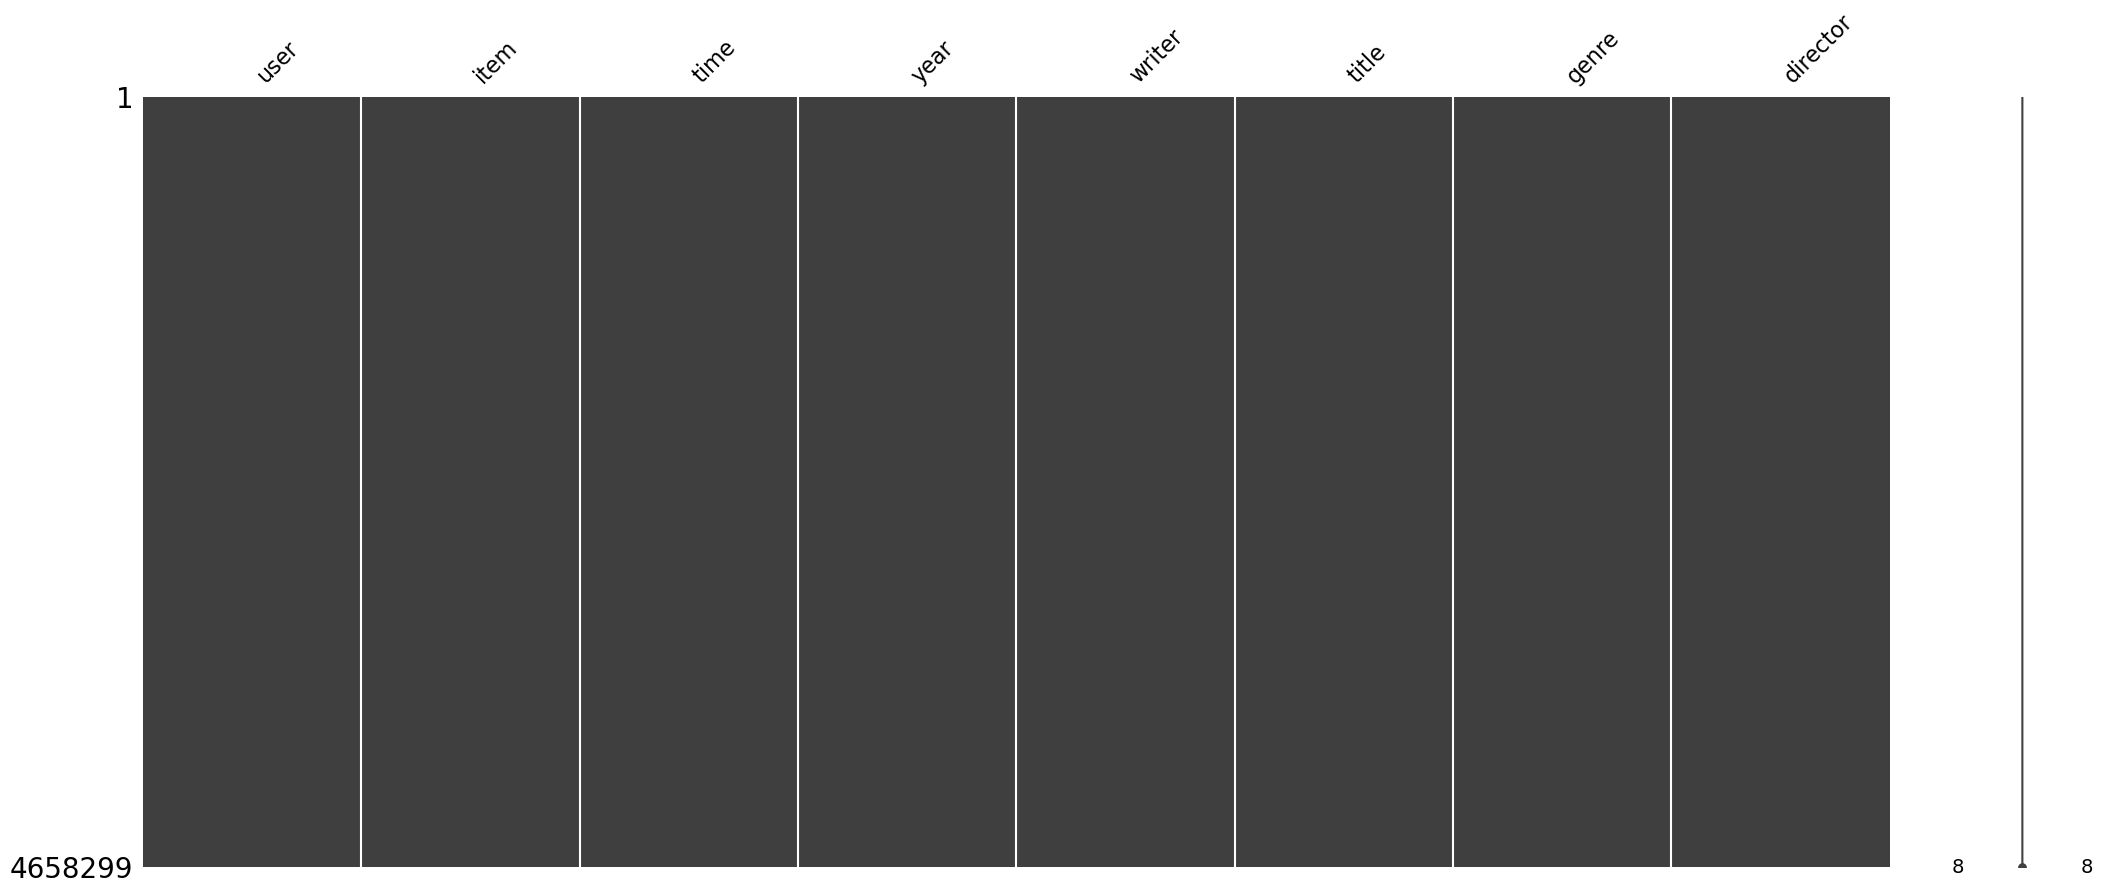

In [72]:
missingno.matrix(df_merge2)

## 데이터 시각화 해보기
앞에서 주어진 데이터셋을 먼저 간단히 살펴보았습니다. 이제부터는 다수의 파일을 merge하여 시각화하고, 데이터에 대해 좀 더 깊은 이해를 해보겠습니다.

먼저 효율적인 데이터 시각화를 위해, 데이터셋에서 빈도수가 높은 movie, user 데이터의 id를 미리 저장하겠습니다.
train 데이터에서 데이터의 출현 빈도 순으로 *active_user_ids*와 *popular_movie_ids*에 top 10을 각각 저장합니다.

대회 데이터셋에서 빈도수가 높을수록 유명한 영화를 나타내는 것은 아니지만, 편의상 *popular_movie_id* 변수명을 사용하는 점을 당부드립니다.

다음 코드를 실행해주세요.

In [111]:
train_df[:2]

,user,item,time
0,11,4643,1230782529
1,11,170,1230782534


In [112]:
active_user_ids = train_df.value_counts('user').index[:10]
popular_movie_ids = train_df.value_counts('item').index[:10]

print ("active user ids: ", active_user_ids)
print ("\npopular movie ids: ", popular_movie_ids)

active user ids:  Int64Index([8405, 54465, 24219, 32514, 91349, 131904, 34576, 99754, 31122,
            118754],
           dtype='int64', name='user')

popular movie ids:  Int64Index([2571, 2959, 296, 318, 356, 4993, 7153, 5952, 593, 2858], dtype='int64', name='item')


*active_user_ids*와 *popular_movie_ids*에 각각 빈도가 높은 영화와 사용자 id들을 저장했습니다. 뒤에서도 계속 사용할 예정이니 참고해 주세요.

이제부터는 train 데이터와 side information 데이터를 merge하고, side information 별 user-item 빈도수가 높은 데이터 샘플을 미리 저장합니다. 위에서 저장한 active user id와 popular movie id와 다르게 여기서는 바로 Pandas Dataframe의 형태로 샘플을 저장합니다. 빈도가 가장 높은 10개 side information data가 해당하는 모든 user-item interaction를 저장할 것이므로, 각 side information 데이터 샘플의 크기는 상이합니다.

이어지는 코드 cell들을 실행해보고, 출력된 결과를 충분히 관찰해보시기 바랍니다.

In [113]:
director_df = pd.merge(train_df, director_data, on=['item'])
director_id = director_df.value_counts('director').index[:10]

side_df = []
for director in director_id:
    side_df.append(director_df.loc[director_df['director'] == director])

director_top = pd.concat(side_df) # 상위 감독 10명의 영화(item)에 대한 평점 데이터 - 67만개

print ("Number of all unique director ids: ", director_df['director'].nunique())
print ("\ntop 10 director ids: \n", director_id)
print ("\nsample of top 10 user-director data: \n", director_top.sample(5))
print ("\nshape of the data: ", director_top.shape)

Number of all unique director ids:  1340

top 10 director ids: 
 Index(['nm0000229', 'nm0000233', 'nm0634240', 'nm0000709', 'nm0001392',
       'nm0000217', 'nm0001054', 'nm0000116', 'nm0000399', 'nm0000631'],
      dtype='object', name='director')

sample of top 10 user-director data: 
            user   item        time   director
1264562  131126   1387  1166046536  nm0000229
1538251   20834   7153  1144277776  nm0001392
3794311   54291  74458  1381029522  nm0000217
1358877    7899  58559  1328409641  nm0634240
2636714    1644  32587  1417850569  nm0000233

shape of the data:  (672019, 4)


In [114]:
writer_df = pd.merge(train_df, writer_data, on=['item'])
writer_id = writer_df.value_counts('writer').index[:10]

side_df = []
for writer in writer_id:
    side_df.append(writer_df.loc[writer_df['writer'] == writer])

writer_top = pd.concat(side_df) # 상위 writer 10명의 영화(item)에 대한 평점 데이터 - 65만개

print ("Number of all unique writer ids: ", writer_df['writer'].nunique())
print ("\ntop 10 writer ids: \n", writer_id)
print ("\nsample of top 10 user-writer data: \n", writer_top.sample(5))
print ("\nshape of the data: ", writer_top.shape)

Number of all unique writer ids:  2989

top 10 writer ids: 
 Index(['nm0000184', 'nm0000233', 'nm0634240', 'nm0001392', 'nm0909638',
       'nm0004056', 'nm0744429', 'nm0101991', 'nm0254645', 'nm0000175'],
      dtype='object', name='writer')

sample of top 10 user-writer data: 
            user   item        time     writer
4434471   45628   2115  1319299279  nm0000184
1672322   78689   6874  1215971089  nm0000233
1725033  105343   6539  1126007502  nm0254645
2077648   17435    296  1364337490  nm0000233
5309084   51241  86880  1376938686  nm0254645

shape of the data:  (651286, 4)


In [115]:
title_df = pd.merge(train_df, title_data, on=['item'])
title_id = title_df.value_counts('title').index[:10]


side_df = []
for title in title_id:
    side_df.append(title_df.loc[title_df['title'] == title])

title_top = pd.concat(side_df) # 상위 영화(item) 10개에 대한 평점 데이터 - 17만개

print ("Number of all unique movie titles: ", title_df['title'].nunique())
print ("\ntop 10 movie titles: \n", title_id)
print ("\nsample of top 10 user-title data: \n", title_top.sample(5))
print ("\nshape of the data: ", title_top.shape)

Number of all unique movie titles:  6806

top 10 movie titles: 
 Index(['Matrix, The (1999)', 'Fight Club (1999)', 'Pulp Fiction (1994)',
       'Shawshank Redemption, The (1994)', 'Forrest Gump (1994)',
       'Lord of the Rings: The Fellowship of the Ring, The (2001)',
       'Lord of the Rings: The Return of the King, The (2003)',
       'Lord of the Rings: The Two Towers, The (2002)',
       'Silence of the Lambs, The (1991)', 'American Beauty (1999)'],
      dtype='object', name='title')

sample of top 10 user-title data: 
            user  item        time  \
879970   108420   593  1152747986   
1079869   81657  5952  1128613102   
1370735   30134  7153  1284065552   
1079344   77433  5952  1127235164   
586027    18528  4993  1264456567   

                                                     title  
879970                    Silence of the Lambs, The (1991)  
1079869      Lord of the Rings: The Two Towers, The (2002)  
1370735  Lord of the Rings: The Return of the King, The... 

In [116]:
year_df = pd.merge(train_df, year_data, on=['item'])
year_id = year_df.value_counts('year').index[:10]

side_df = []
for year in year_id:
    side_df.append(year_df.loc[year_df['year'] == year])

year_top = pd.concat(side_df) # 상위 년도 10개의 영화(item)에 대한 평점 데이터 - 21만개

print ("All unique years: \n", np.sort(year_df['year'].unique())) 
print ("\nNumber of all unique years: ", year_df['year'].nunique())
print ("\ntop 10 years: \n", year_id)
print ("\nsample of top 10 user-year data: \n", year_top.sample(5))
print ("\nshape of the data: ", year_top.shape)

All unique years: 
 [1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935
 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949
 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014]

Number of all unique years:  93

top 10 years: 
 Int64Index([2004, 1999, 2001, 2002, 2006, 2003, 2000, 2005, 1995, 2007], dtype='int64', name='year')

sample of top 10 user-year data: 
           user  item        time  year
3820230  35378  5668  1161503647  2002
1661785   2158  3175  1171632313  1999
124574   43019  2706  1407385013  1999
1226318  40523  8972  1342410326  2004
2541147  32555    34  1146906482  1995

shape of the data:  (2173226, 4)


여기까지 director, writer, title, year 데이터를 확인해 보았는데요. 이어서 genre 데이터도 관찰해보겠습니다. 데이터셋에서 genre의 수가 총 18개밖에 없으므로 빈도수가 높은 genre를 따로 저장할 필요 없이, train 데이터와의 merge를 바로 진행하겠습니다.

다음 코드를 실행하고 genre 데이터의 형태도 관찰해보세요.

In [117]:
genre_df = pd.merge(train_df, genre_data, on=['item'])

genre_top = genre_df # 장르 18개의 영화(item)에 대한 평점 데이터 - 65만개

print ("All unique genres: \n", np.sort(genre_df['genre'].unique())) 
print ("\nNumber of all unique genres: ", genre_df['genre'].nunique())
print ("\nsample of user-genre data: \n", genre_top.sample(5))
print ("\nshape of the data: ", genre_top.shape)

All unique genres: 
 ['Action' 'Adventure' 'Animation' 'Children' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Fantasy' 'Film-Noir' 'Horror' 'Musical' 'Mystery'
 'Romance' 'Sci-Fi' 'Thriller' 'War' 'Western']

Number of all unique genres:  18

sample of user-genre data: 
             user   item        time      genre
5897383    25594   1517  1146062588  Adventure
2303728    78161  54001  1285809104      Drama
13646886   60044   1614  1390079396     Comedy
2978126   116067    165  1292191090   Thriller
13778245  133700   5367  1138234620    Romance

shape of the data:  (14126324, 4)


여기까지 오셨으면 side information 데이터의 형태를 충분히 파악하셨을 것으로 생각됩니다! 이제
matplotlib library를 사용하여 샘플한 데이터를 그래프로 시각화해봅니다. 

In [118]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

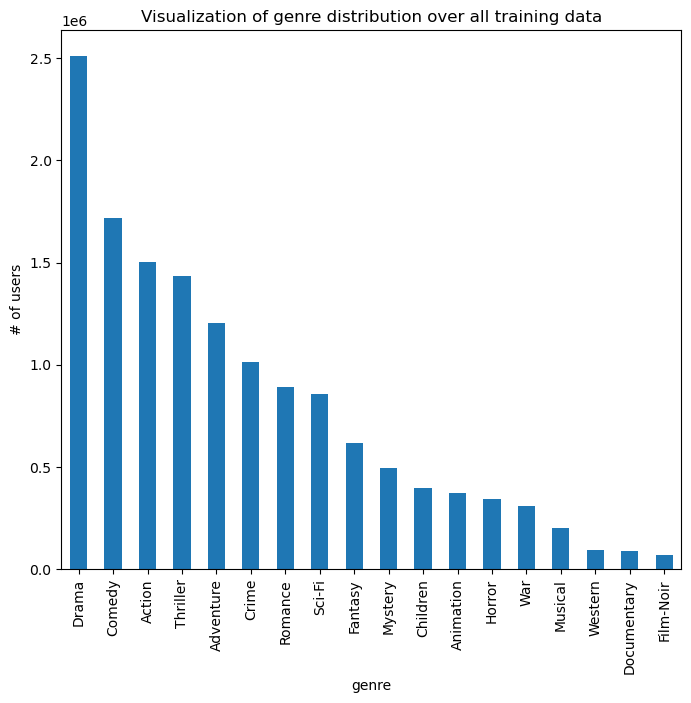

In [119]:
genre_top['genre'].value_counts().plot(kind = 'bar', figsize = (8,7))
plt.xlabel('genre')
plt.ylabel('# of users')
plt.title('Visualization of genre distribution over all training data')
plt.show

데이터셋에서 가장 많이 출현하는 장르가 *Drama*, 가장 적게 출현하는 장르가 *Film-Noir*임을 확인할 수 있었습니다.

그러면 전체 training 데이터에서의 genre 분포 뿐만 아니라, genre 데이터 단독의 분포를 출력하면 어떤지 비교해 봅니다. 코드를 실행해주세요.

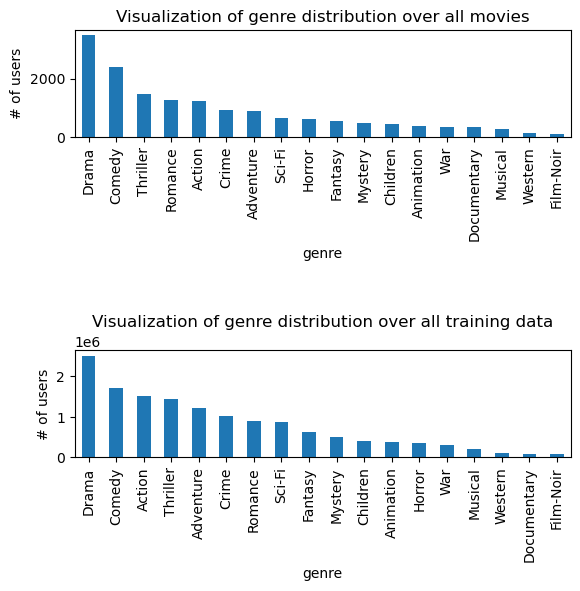

In [120]:
plt.subplot(2,1,1)
genre_data['genre'].value_counts().plot(kind = 'bar')
plt.xlabel('genre')
plt.ylabel('# of users')
plt.title('Visualization of genre distribution over all movies')

plt.subplot(2,1,2)
genre_top['genre'].value_counts().plot(kind = 'bar')
plt.xlabel('genre')
plt.ylabel('# of users')
plt.title('Visualization of genre distribution over all training data')

plt.subplots_adjust(hspace=2.0, top=1.0)

두 개의 그래프를 확인하면 거의 비슷해보이지만, 두 분포 사이에 작은 차이가 있음을 확인할 수 있습니다. 가령, *Romance* 장르의 영화가 전체 훈련 데이터에서는 7위를 차지하지만, 모든 6807개의 영화 중에서는 4위를 차지합니다. 이는 *Romance* 장르에 해당하는 영화의 갯수에 비해 실제 사용자들이 시청할 확률이 더 높았다는 것을 뜻합니다.

다음은 사용자 한명이 시청한 영화 리스트를 확인하고, 해당 사용자가 가장 선호하는 장르를 순위별로 차트로 알아보겠습니다. 다음 코드에서는 데이터가 가장 많은 사용자의 id인 `active_user_ids[0]`를 사용하겠습니다.
그럼 코드를 실행해보세요!

<AxesSubplot: >

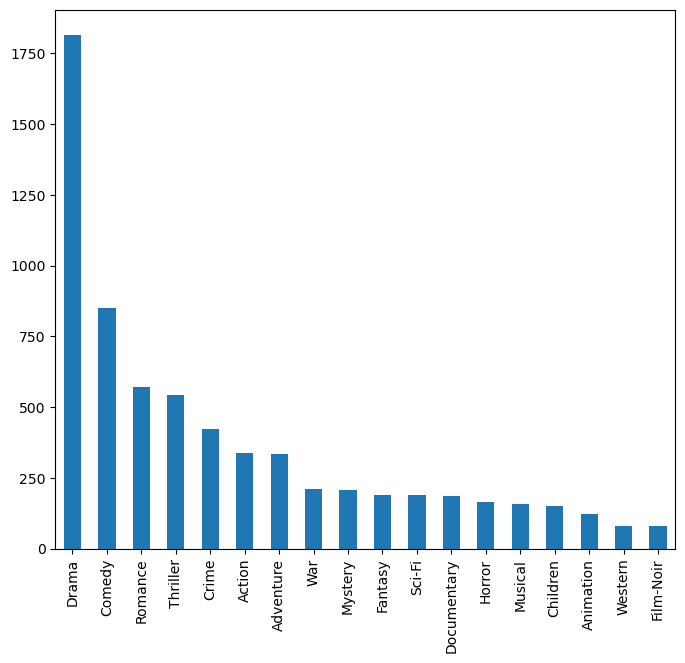

In [121]:
user_id = active_user_ids[0] # specific user id
genre_user = genre_top[genre_top['user'] == user_id]

genre_user['genre'].value_counts().plot(kind = 'bar', figsize = (8,7))

`active_user_ids[0]`에 해당하는 사용자의 시청영화 장르 분포는 전체 데이터의 장르 분포와 크게 차이가 나지 않습니다. 그렇다면 `active_user_ids[1]`에 해당하는 사용자는 어떨까요? 다양한 사용자들의 장르 분포도 한번 비교해 보시기 바랍니다.


다음은 사용자가 주로 언제 영화를 시청했는지 알아보려고 합니다.
그 전에 먼저 간단히 알고 넘어가면 좋은 내용이 있는데요. train 데이터를 보시면 timestamp column은 유닉스 시간(Unix time)을 초 단위로 표시한 것입니다. 통계를 위해 이것을 우리가 알아볼 수 있는 단위로 변환하는 방법을 알아보겠습니다. 다음 코드를 실행해보세요.

In [122]:
import time
unix_time = 1230782529 # some random timestamp from dataset
converted_time = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(unix_time))

print ("initial unix-based timestamp: %s\nconverted time: %s"%(unix_time, converted_time))

initial unix-based timestamp: 1230782529
converted time: 2009-01-01 04:02:09


파이썬의 time 라이브러리를 사용하여 연-월-일 시간-분-초 단위까지 잘 변환이 되는 것을 확인했습니다. 
하지만 우리 데이터셋의 영화 연도 분포와 task를 고려했을때 시간-분-초 단위는 크게 중요하지 않을 것 같습니다. 일 단위도 빼고, 연-월 단위만 가지고 사용자의 시청 연-월 그래프를 확인해보겠습니다.

즉, 위와 같은 방법으로 timestamp를 변환하여 `active_user_ids[0]`에 해당하는 사용자가 어느 시기에 가장 많은 interaction 활동을 했는지 알아봅니다. 다음 코드를 실행하여 그래프를 확인해봅니다.

/tmp/ipykernel_127645/3998196915.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  converted_df['time'] = old_df['time'].replace([old_time], new_time) # replace the time column


Text(0.5, 1.0, 'Statistics of user activity')

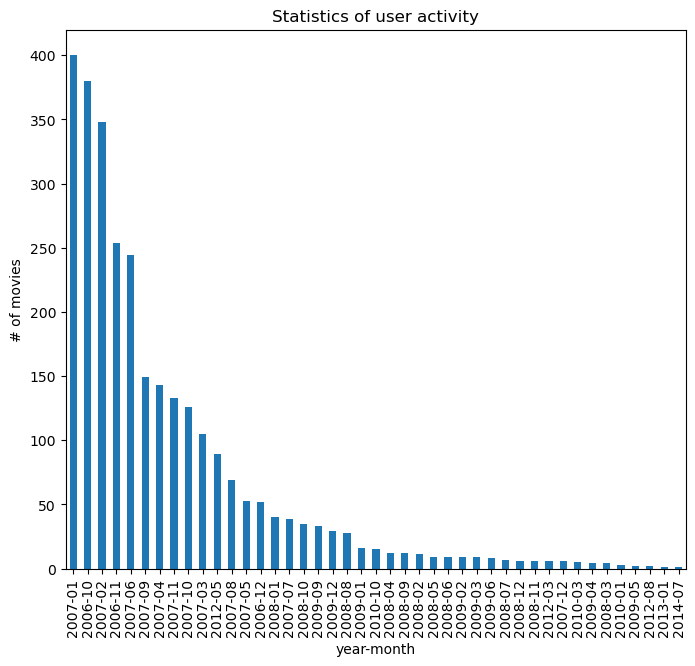

In [123]:
old_df = train_df[train_df['user'] == active_user_ids[0]] # Specific user id
converted_df = old_df

for old_time in old_df['time']:
    new_time = time.strftime('%Y-%m', time.localtime(old_time))
    converted_df['time'] = old_df['time'].replace([old_time], new_time) # replace the time column

converted_df['time'].value_counts().plot(kind = 'bar', figsize = (8,7))
plt.xlabel('year-month')
plt.ylabel('# of movies')
plt.title('Statistics of user activity')

해당 사용자는 대략 2007년 전후로 영화 시청을 가장 많이 했고, 시간이 지나면서 시청 기록이 점점 줄어드는 확인할 수 있습니다.

이어서 사용자가 처음으로 또는 마지막으로 영화 시청을 한 시기도 직접 출력해볼 수 있겠습니다. 또, 다른 사용자들의 분포는 얼마나 다를까요?
혹은, 어떤 영화가 어떤 연도에 가장 많이 소비되었을까요?

눈치 채셨을지 모르겠지만, 앞서 저장했던 *popular_movie_id* 변수는 시각화에 사용되지 않았는데요. 선택 과제로 활용해보시기 바랍니다!

## 마치며

여기까지 오시느라 모두 수고 많으셨습니다. 본 미션에서는 여러 데이터를 관찰하고, 또 분포를 출력해보면서 데이터에 대해 이해하는 시간을 가져보았는데요.
미션에서 제공된 정보 외에도 다른 분석들을 추가로 해보시면 대회를 준비하는데 더 도움이 될 것입니다.
많은 인사이트를 얻어가셔서 대회에 충분히 활용하시길 바라겠습니다!

###**콘텐츠 라이선스**

<font color='red'><b>**WARNING**</b></font> : **본 교육 콘텐츠의 지식재산권은 재단법인 네이버커넥트에 귀속됩니다. 본 콘텐츠를 어떠한 경로로든 외부로 유출 및 수정하는 행위를 엄격히 금합니다.** 다만, 비영리적 교육 및 연구활동에 한정되어 사용할 수 있으나 재단의 허락을 받아야 합니다. 이를 위반하는 경우, 관련 법률에 따라 책임을 질 수 있습니다.

